In [8]:
import sys
sys.path.append('/Users/mistletoe/量化金融/5-PF')
from backtest.etf_backtesting import *
backtester = Backtesting()
backtester.set_parameters(
    start_date='2020-01-01',
    end_date='2023-12-31',
    frequency_entry='1d',
    frequency_exit='60m')

In [9]:
df_price = backtester.load_data()
symbol = backtester.load_code()
df_price_high = get_price(symbol, backtester.start_date, backtester.end_date, backtester.frequency_entry)[['high']].unstack(level = 0)
df_price_high.columns = df_price_high.columns.droplevel(0)

df_volume = get_price(symbol, backtester.start_date, backtester.end_date, backtester.frequency_entry)[['volume']].unstack(level = 0)
df_volume.columns = df_volume.columns.droplevel(0)

<Axes: xlabel='date'>

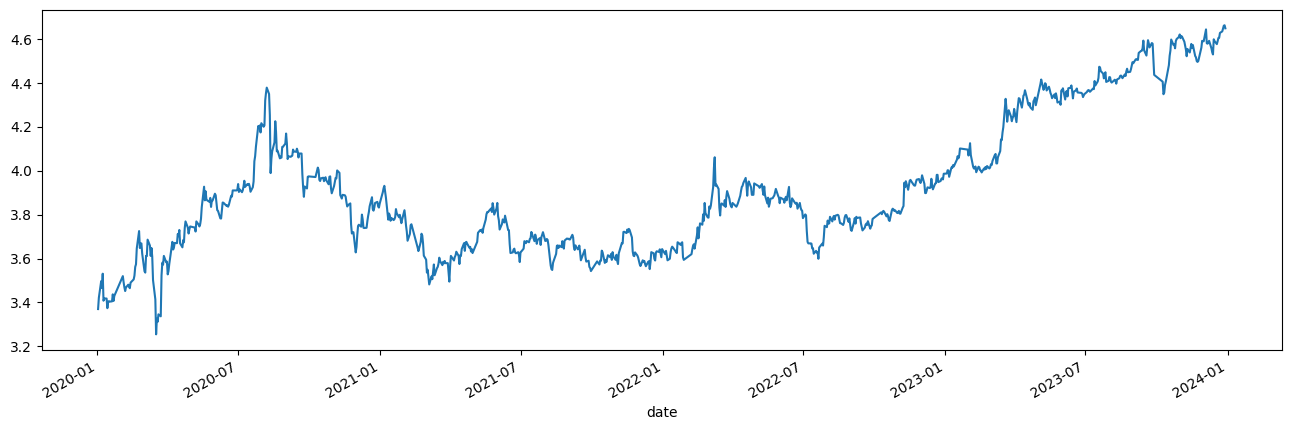

In [10]:
df_price['518880.XSHG'].plot(figsize = (16,5))

<Axes: xlabel='date'>

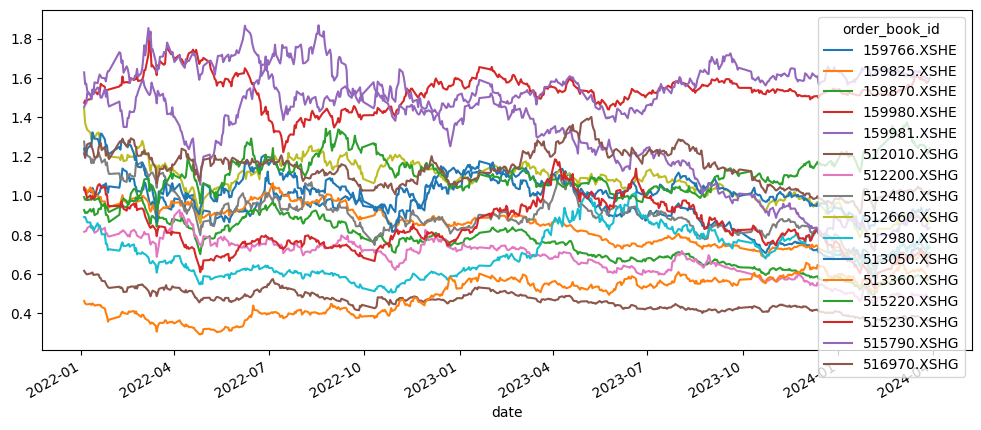

In [37]:
nona = df_price.loc['2022-01-01':'2024-03-31'].dropna(axis = 1,how = 'all')
nona.plot(figsize = (12,5))

In [34]:
nona.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 975 entries, 2016-01-04 to 2019-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   159980.XSHE  6 non-null      float64
 1   512010.XSHG  975 non-null    float64
 2   512200.XSHG  552 non-null    float64
 3   512480.XSHG  139 non-null    float64
 4   512660.XSHG  829 non-null    float64
 5   512980.XSHG  474 non-null    float64
 6   513050.XSHG  720 non-null    float64
dtypes: float64(7)
memory usage: 60.9 KB


In [6]:
df_price.pct_change().corr()

order_book_id,159766.XSHE,159825.XSHE,159870.XSHE,159980.XSHE,159981.XSHE,512010.XSHG,512200.XSHG,512480.XSHG,512660.XSHG,512980.XSHG,513050.XSHG,513360.XSHG,515220.XSHG,515230.XSHG,515790.XSHG,516970.XSHG
order_book_id,,,,,,,,,,,,,,,,
159766.XSHE,1.000000,0.420103,0.384710,0.187908,0.099521,0.423159,0.402236,0.295572,0.228734,0.389616,0.490907,0.442386,0.157452,0.329263,0.248631,0.302626
159825.XSHE,0.420103,1.000000,0.585396,0.212661,0.182423,0.457388,0.285114,0.258334,0.411122,0.357463,0.392523,0.411028,0.289145,0.366643,0.418679,0.372617
159870.XSHE,0.384710,0.585396,1.000000,0.244527,0.201010,0.461025,0.363713,0.423661,0.539054,0.295563,0.473052,0.365168,0.440995,0.410209,0.651828,0.436194
159980.XSHE,0.187908,0.212661,0.244527,1.000000,0.524164,0.190413,0.318936,0.176124,0.164866,0.217869,0.284334,0.228987,0.381249,0.144290,0.136799,0.290042
159981.XSHE,0.099521,0.182423,0.201010,0.524164,1.000000,0.127797,0.245090,0.158794,0.163725,0.176390,0.194600,0.165259,0.403273,0.130374,0.119602,0.214853
512010.XSHG,0.423159,0.457388,0.461025,0.190413,0.127797,1.000000,0.307447,0.371426,0.381732,0.431994,0.490152,0.406157,0.058941,0.410764,0.365600,0.195439
512200.XSHG,0.402236,0.285114,0.363713,0.318936,0.245090,0.307447,1.000000,0.256239,0.307835,0.450293,0.428433,0.379028,0.376206,0.260435,0.100912,0.573441
512480.XSHG,0.295572,0.258334,0.423661,0.176124,0.158794,0.371426,0.256239,1.000000,0.560488,0.482683,0.334298,0.304624,0.133355,0.594115,0.433536,0.209780
512660.XSHG,0.228734,0.411122,0.539054,0.164866,0.163725,0.381732,0.307835,0.560488,1.000000,0.445212,0.262966,0.267866,0.244915,0.517443,0.552535,0.308543


### 北向资金择时研究

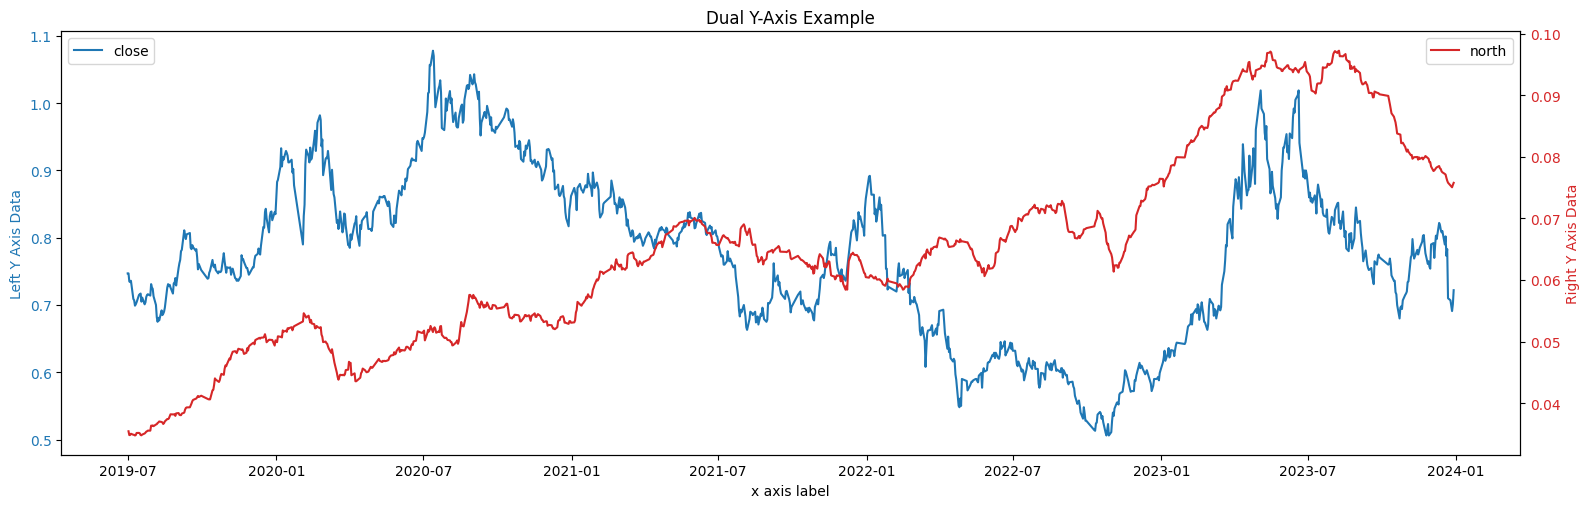

In [7]:
fig, ax1 = plt.subplots(figsize = (16,5))

color = 'tab:blue'
ax1.set_xlabel('x axis label')
ax1.set_ylabel('Left Y Axis Data', color=color)
ax1.plot(df_price.index, df_price['512980.XSHG'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Right Y Axis Data', color=color)
ax2.plot(north.index,north['512980.XSHG'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Dual Y-Axis Example')
ax1.legend(['close'], loc='upper left')
ax2.legend(['north'], loc='upper right')

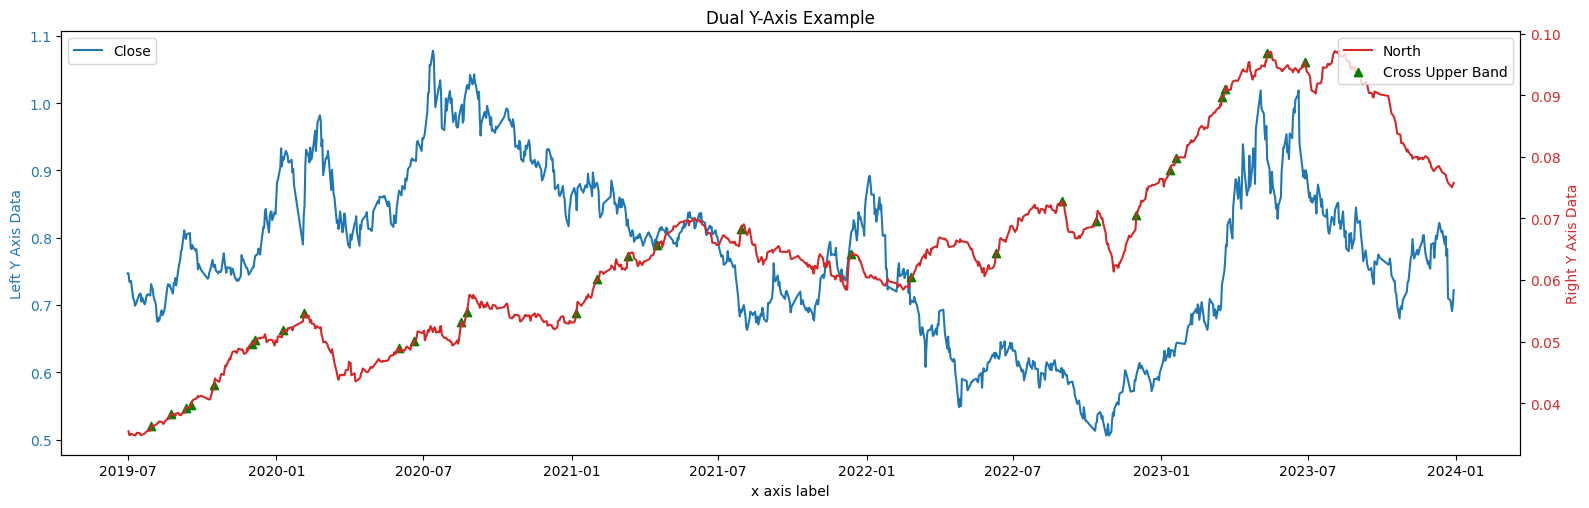

In [9]:
window = 20
num_std = 2
middle_band = north['512980.XSHG'].rolling(window=window).mean()
std_dev = north['512980.XSHG'].rolling(window=window).std()
upper_band = middle_band + (std_dev * num_std)
crossings = (north['512980.XSHG'] > upper_band) & (north['512980.XSHG'].shift(1) <= upper_band.shift(1))
fig, ax1 = plt.subplots(figsize=(16, 5))

color = 'tab:blue'
ax1.set_xlabel('x axis label')
ax1.set_ylabel('Left Y Axis Data', color=color)
ax1.plot(df_price.index, df_price['512980.XSHG'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Right Y Axis Data', color=color)
ax2.plot(north.index, north['512980.XSHG'], color=color)
ax2.scatter(north.index[crossings], north['512980.XSHG'][crossings], color='green', label='Cross Upper Band', marker='^')  # 标记上穿点
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Dual Y-Axis Example')
ax1.legend(['Close'], loc='upper left')
ax2.legend(['North', 'Cross Upper Band'], loc='upper right')

plt.show()

### 高点突破择时研究

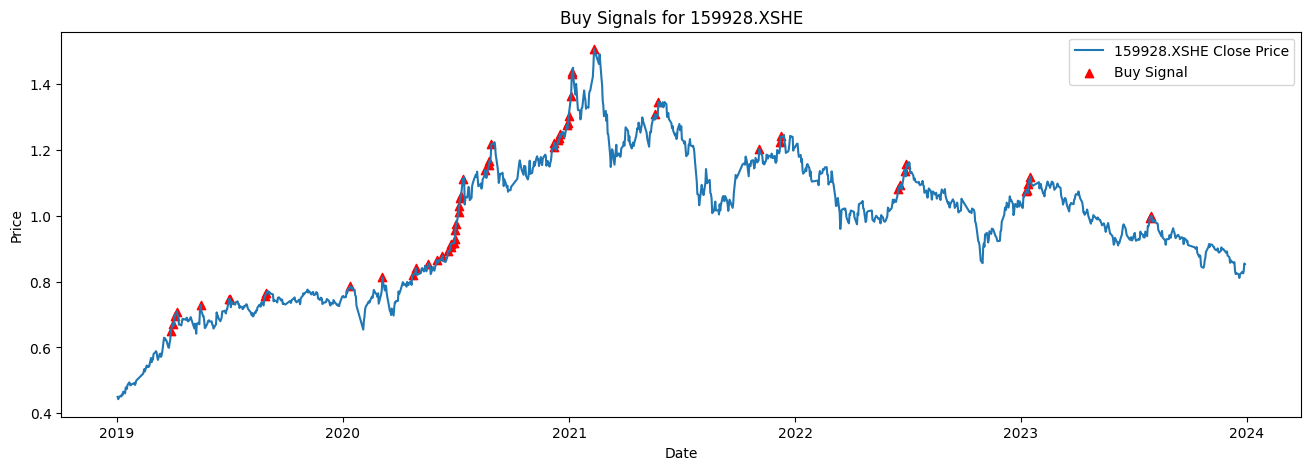

In [51]:
rolling_max = df_price_high.rolling(window=50).max().shift(1)
buy_signals = pd.DataFrame(index=df_price.index, columns=df_price.columns)
for etf in df_price.columns:
    buy_signals[etf] = df_price[etf] > rolling_max[etf]

etf_to_plot = '159928.XSHE' 
plt.figure(figsize=(16, 5))
plt.plot(df_price.index, df_price[etf_to_plot], label=f'{etf_to_plot} Close Price')
buy_dates = buy_signals.index[buy_signals[etf_to_plot]]
buy_prices = df_price[etf_to_plot][buy_signals[etf_to_plot]]
plt.scatter(buy_dates, buy_prices, color='red', label='Buy Signal', marker='^')

plt.title(f'Buy Signals for {etf_to_plot}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 均线突破择时研究

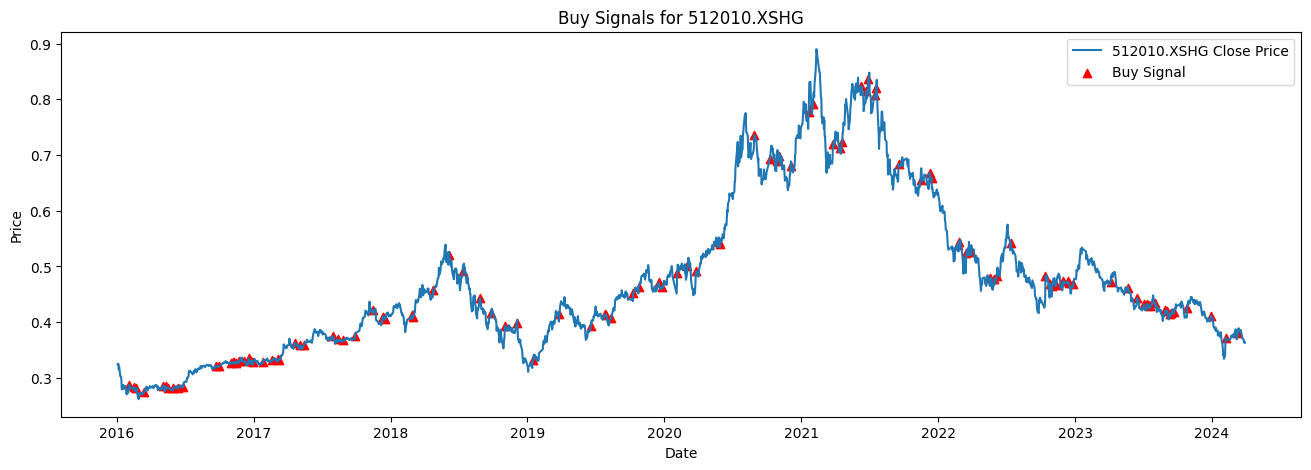

In [45]:
rolling_mean = df_price.rolling(window=20).mean()
buy_signals = pd.DataFrame(index=df_price.index, columns=df_price.columns)
for etf in df_price.columns:
    condition1 = df_price[etf].shift(1) < rolling_mean[etf].shift(1)
    condition2 = df_price[etf] > rolling_mean[etf]
    buy_signals[etf] = condition1 & condition2
etf_to_plot = '512010.XSHG'

plt.figure(figsize=(16, 5))
plt.plot(df_price.index, df_price[etf_to_plot], label=f'{etf_to_plot} Close Price')

buy_dates = buy_signals.index[buy_signals[etf_to_plot]]
buy_prices = df_price[etf_to_plot][buy_signals[etf_to_plot]]
plt.scatter(buy_dates, buy_prices, color='red', label='Buy Signal', marker='^')

plt.title(f'Buy Signals for {etf_to_plot}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 实际入场则是

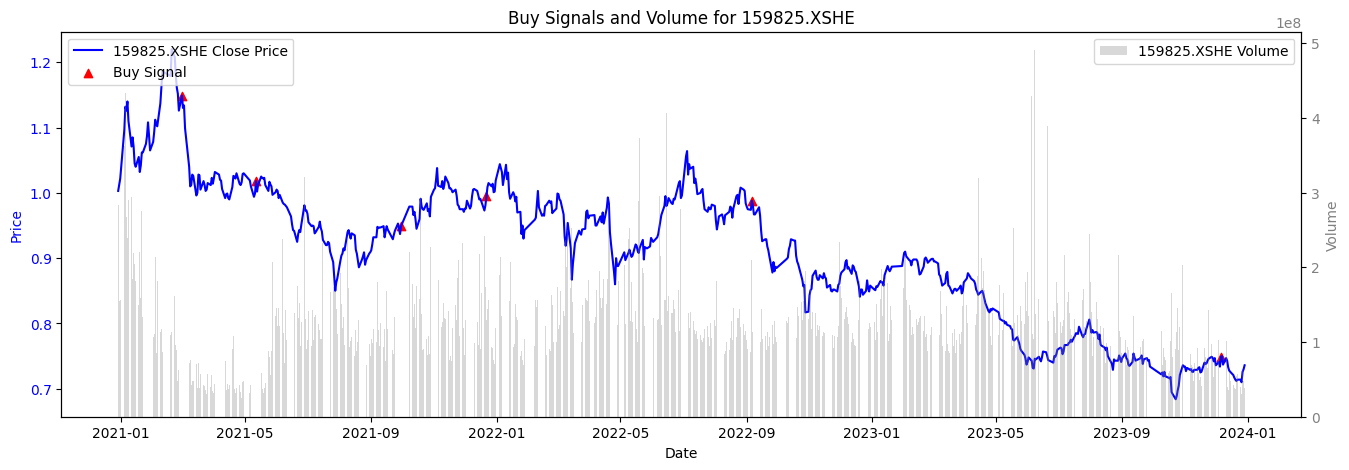

In [4]:
trade = pd.read_csv('20trade.csv').iloc[:,1:].set_index('ETF')
etf_to_plot = '159825.XSHE'

fig, ax1 = plt.subplots(figsize=(16, 5))
ax1.plot(df_price.index, df_price[etf_to_plot], label=f'{etf_to_plot} Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
buy_dates = trade.loc[etf_to_plot]['Buy_Date']
buy_prices = trade.loc[etf_to_plot]['Buy_Price']
ax1.scatter(buy_dates, buy_prices, color='red', label='Buy Signal', marker='^')


ax2 = ax1.twinx()
ax2.bar(df_volume.index, df_volume[etf_to_plot], label=f'{etf_to_plot} Volume', color='grey', alpha=0.3)
ax2.set_ylabel('Volume', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title(f'Buy Signals and Volume for {etf_to_plot}')

# 显示图表
plt.show()

<Axes: xlabel='date'>

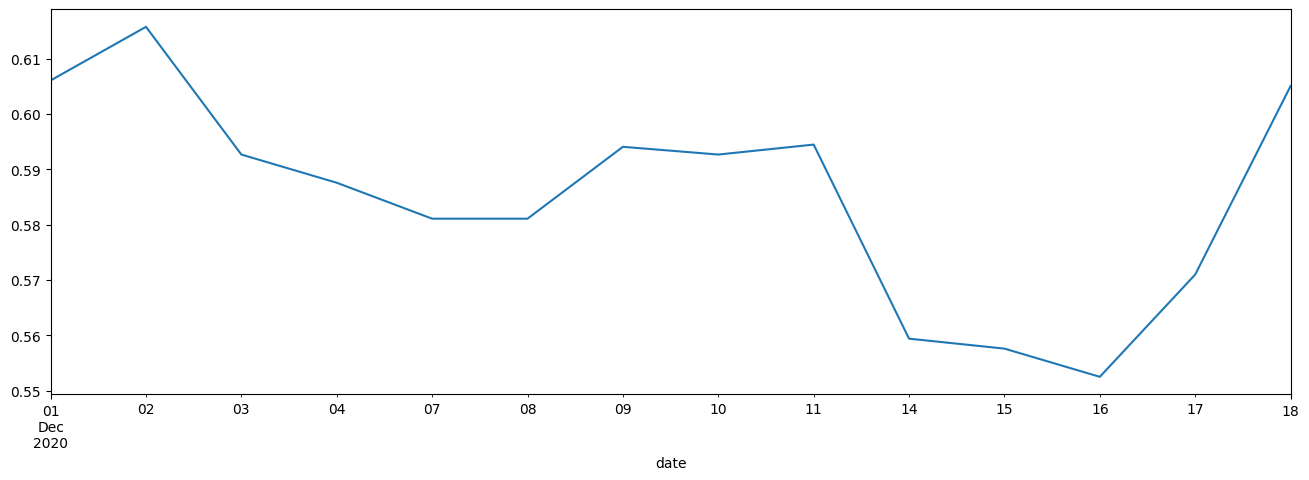

In [23]:
df_price['515220.XSHG'].loc['2020-12-1':'2020-12-20'].plot(figsize = (16,5))

### rsrs 突破研究


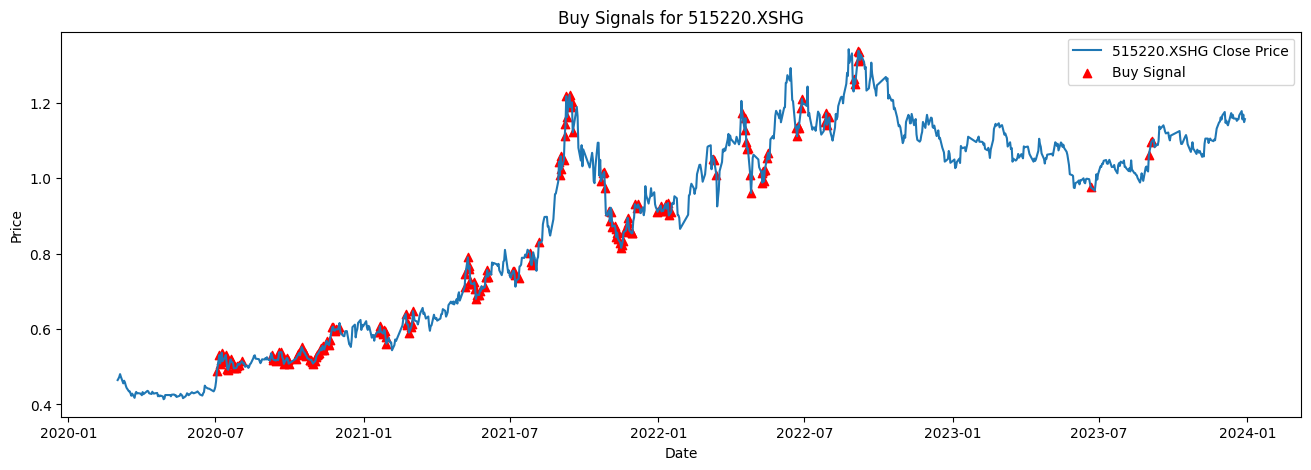

In [61]:
rsrs = pd.read_pickle('beta.pkl')
buy_signals = pd.DataFrame(index=df_price.index, columns=df_price.columns)
for etf in df_price.columns:
    buy_signals[etf] = rsrs[etf] > 1.1

etf_to_plot = '515220.XSHG' 
plt.figure(figsize=(16, 5))
plt.plot(df_price.index, df_price[etf_to_plot], label=f'{etf_to_plot} Close Price')
buy_dates = buy_signals.index[buy_signals[etf_to_plot]]
buy_prices = df_price[etf_to_plot][buy_signals[etf_to_plot]]
plt.scatter(buy_dates, buy_prices, color='red', label='Buy Signal', marker='^')

plt.title(f'Buy Signals for {etf_to_plot}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# 提取拥挤度指标

In [ ]:
df_LA = get_price(backtester.symbol, backtester.start_date, backtester.end_date, backtester.frequency_entry)[['total_turnover']]
df_LA['to_std'] = df_LA.groupby(level=0)['total_turnover'].rolling(window=60).std().reset_index(level=0, drop=True)
to_std = df_LA[['to_std']].reset_index()
to_std = to_std.set_index(['date','order_book_id'])['to_std']
to_std

date        order_book_id
2023-06-21  159507.XSHE               NaN
2023-06-26  159507.XSHE               NaN
2023-06-27  159507.XSHE               NaN
2023-06-28  159507.XSHE               NaN
2023-06-29  159507.XSHE               NaN
                                 ...     
2023-12-25  561320.XSHG      3.214524e+06
2023-12-26  561320.XSHG      3.186055e+06
2023-12-27  561320.XSHG      3.193093e+06
2023-12-28  561320.XSHG      3.052050e+06
2023-12-29  561320.XSHG      3.158805e+06
Name: to_std, Length: 22167, dtype: float64

In [11]:
to_std = pd.DataFrame(to_std)
to_std = to_std.pivot_table(columns='order_book_id',index = 'date',values = 'to_std')
to_std

order_book_id,159507.XSHE,159611.XSHE,159619.XSHE,159766.XSHE,159825.XSHE,159852.XSHE,159869.XSHE,159870.XSHE,159928.XSHE,159930.XSHE,...,512660.XSHG,512800.XSHG,512880.XSHG,512980.XSHG,513050.XSHG,515030.XSHG,515790.XSHG,515880.XSHG,516110.XSHG,561320.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2019-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.395476e+07,5.927089e+05,...,8.003558e+07,3.420515e+07,2.399883e+08,8.197429e+06,2.687596e+07,NaN,NaN,NaN,NaN,NaN
2019-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.292586e+07,5.929858e+05,...,7.983526e+07,3.385530e+07,2.350454e+08,8.228609e+06,2.714094e+07,NaN,NaN,NaN,NaN,NaN
2019-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.277984e+07,5.909913e+05,...,7.981242e+07,3.387800e+07,2.350280e+08,8.247999e+06,2.711843e+07,NaN,NaN,NaN,NaN,NaN
2019-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.129232e+07,5.905369e+05,...,8.004370e+07,3.672974e+07,2.354594e+08,8.237760e+06,2.692460e+07,NaN,NaN,NaN,NaN,NaN
2019-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.018592e+07,5.841597e+05,...,7.900907e+07,3.664231e+07,2.357694e+08,8.221013e+06,2.712792e+07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,2.900534e+06,3.515959e+07,4.571296e+06,4.853614e+07,2.387633e+07,1.766143e+07,1.594977e+08,4.075651e+07,4.319260e+07,1.087695e+07,...,8.456624e+07,4.296717e+07,3.340958e+08,7.982694e+07,2.427768e+08,5.493363e+07,1.547585e+08,4.606543e+07,4.336586e+07,3.214524e+06
2023-12-26,2.920086e+06,3.519688e+07,4.609781e+06,4.891293e+07,2.429914e+07,1.762654e+07,1.604009e+08,3.953815e+07,4.316593e+07,1.087686e+07,...,8.427285e+07,4.379850e+07,3.358131e+08,7.958567e+07,2.484044e+08,5.578221e+07,1.548116e+08,4.576650e+07,4.382226e+07,3.186055e+06
2023-12-27,2.946158e+06,3.714647e+07,4.612327e+06,4.891802e+07,2.416167e+07,1.772881e+07,1.603667e+08,3.969811e+07,4.334813e+07,1.033443e+07,...,8.452424e+07,4.382895e+07,3.303951e+08,7.957869e+07,2.487340e+08,5.532996e+07,1.543566e+08,4.446954e+07,4.406820e+07,3.193093e+06


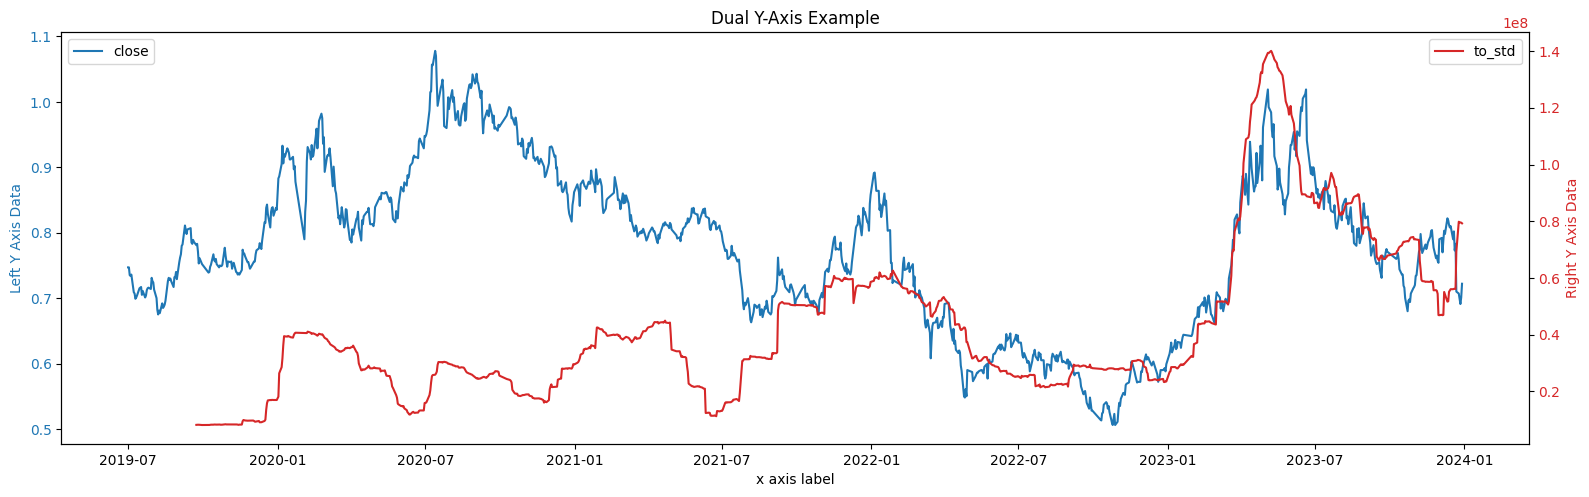

In [17]:
fig, ax1 = plt.subplots(figsize = (16,5))

color = 'tab:blue'
ax1.set_xlabel('x axis label')
ax1.set_ylabel('Left Y Axis Data', color=color)
ax1.plot(df_price.index, df_price['512980.XSHG'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Right Y Axis Data', color=color)
ax2.plot(to_std.index,to_std['512980.XSHG'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Dual Y-Axis Example')
ax1.legend(['close'], loc='upper left')
ax2.legend(['to_std'], loc='upper right')

In [18]:
to_std.to_pickle('to_std.pkl')

In [10]:
# 选取各个 ETF 中前5大流通股
df_etf = all_instruments(type='ETF' , market = 'cn')
df_etf = df_etf[df_etf.order_book_id.isin(df_price.columns)]
index_symbol = df_etf.underlying_order_book_id.tolist()
index_stk = {}
for index in index_symbol:
    underlying_stk = index_components(index)
    if not underlying_stk:
        continue
    shares = get_shares(underlying_stk, start_date='2024-03-29', end_date='2024-03-30', fields=None, market='cn', expect_df=True).reset_index()[['order_book_id','circulation_a']].set_index('order_book_id')
    price = get_price(underlying_stk, start_date='2024-03-29', end_date='2024-03-30').reset_index()[['order_book_id','close']].set_index('order_book_id')
    shares['market_size'] = shares.circulation_a * price.close
    top_10_stocks = shares.sort_values(by = 'market_size',ascending=False).head(10).index.tolist()
    index_stk[index] = top_10_stocks

In [12]:
index_stk_df = pd.DataFrame(index_stk)
index_stk_df

,399389.XSHE,H30199.XSHG,930608.INDX,930633.INDX,000949.XSHG,930601.INDX,930901.INDX,000813.XSHG,000932.XSHG,000928.XSHG,...,H30184.XSHG,399967.XSHE,399986.XSHE,399975.XSHE,399971.XSHE,399976.XSHE,931151.INDX,931160.INDX,H30015.XSHG,000945.XSHG
0,600050.XSHG,600900.XSHG,601668.XSHG,601888.XSHG,002714.XSHE,688111.XSHG,300418.XSHE,600309.XSHG,600519.XSHG,601857.XSHG,...,002371.XSHE,600150.XSHG,601398.XSHG,600030.XSHG,002027.XSHE,300750.XSHE,601012.XSHG,601138.XSHG,002594.XSHE,601816.XSHG
1,688036.XSHG,601985.XSHG,601390.XSHG,601111.XSHG,300498.XSHE,002230.XSHE,002602.XSHE,600989.XSHG,000858.XSHE,601088.XSHG,...,603501.XSHG,601989.XSHG,601288.XSHG,300059.XSHE,300418.XSHE,002594.XSHE,300274.XSHE,688036.XSHG,600104.XSHG,002352.XSHE
2,601728.XSHG,600025.XSHG,600031.XSHG,600029.XSHG,002311.XSHE,600845.XSHG,300251.XSHE,002493.XSHE,600809.XSHG,600028.XSHG,...,688012.XSHG,600760.XSHG,601988.XSHG,601211.XSHG,002602.XSHE,300124.XSHE,600438.XSHG,300308.XSHE,601633.XSHG,601919.XSHG
3,300308.XSHE,003816.XSHE,601800.XSHG,600009.XSHG,000876.XSHE,601360.XSHG,002555.XSHE,600346.XSHG,000568.XSHE,601225.XSHG,...,688981.XSHG,600893.XSHG,600036.XSHG,600999.XSHG,002739.XSHE,002050.XSHE,000100.XSHE,000063.XSHE,000625.XSHE,600018.XSHG
4,000063.XSHE,600886.XSHG,601186.XSHG,601021.XSHG,600873.XSHG,600570.XSHG,002558.XSHE,000792.XSHE,603288.XSHG,600188.XSHG,...,688256.XSHG,002179.XSHE,601166.XSHG,601688.XSHG,300251.XSHE,300014.XSHE,600089.XSHG,300394.XSHE,600660.XSHG,601006.XSHG
5,600941.XSHG,600011.XSHG,601669.XSHG,600115.XSHG,600598.XSHG,600588.XSHG,002517.XSHE,600160.XSHG,600887.XSHG,601898.XSHG,...,688041.XSHG,601698.XSHG,601658.XSHG,000166.XSHE,603000.XSHG,002466.XSHE,002459.XSHE,600522.XSHG,601689.XSHG,601111.XSHG
6,601698.XSHG,600795.XSHG,601618.XSHG,600515.XSHG,601118.XSHG,300033.XSHE,002624.XSHE,002648.XSHE,002714.XSHE,600938.XSHG,...,002049.XSHE,000768.XSHE,601328.XSHG,601995.XSHG,002555.XSHE,603799.XSHG,601865.XSHG,600745.XSHG,002920.XSHE,600029.XSHG
7,300394.XSHE,600023.XSHG,000157.XSHE,603885.XSHG,600486.XSHG,301236.XSHE,300002.XSHE,000301.XSHE,002304.XSHE,601699.XSHG,...,688008.XSHG,600372.XSHG,601998.XSHG,601881.XSHG,601928.XSHG,002460.XSHE,603806.XSHG,300502.XSHE,601238.XSHG,600009.XSHG
8,600522.XSHG,600674.XSHG,000425.XSHE,600754.XSHG,002299.XSHE,600536.XSHG,300315.XSHE,600426.XSHG,000596.XSHE,601808.XSHG,...,688396.XSHG,600482.XSHG,600000.XSHG,601066.XSHG,300413.XSHE,603659.XSHG,688599.XSHG,600487.XSHG,600741.XSHG,601872.XSHG
9,600745.XSHG,600905.XSHG,600039.XSHG,600004.XSHG,603477.XSHG,002405.XSHE,600633.XSHG,603260.XSHG,300498.XSHE,000983.XSHE,...,600584.XSHG,002625.XSHE,000001.XSHE,000776.XSHE,600637.XSHG,300450.XSHE,002129.XSHE,002281.XSHE,601058.XSHG,601021.XSHG


In [49]:
import logging
logging.basicConfig(level=logging.INFO)
def get_turnover(stock_list, start, end):
    # 一个月换手率滚动平均
    turnover_rate = get_turnover_rate(stock_list, start, end, 'month')
    turnover_rate = turnover_rate.unstack(level = 0)
    turnover_rate.columns = turnover_rate.columns.droplevel(0)
    return turnover_rate

def get_vol(stock_list, start, end):
    # 一个月波动平均
    price = get_price(stock_list, start,end, frequency = '1d')[['close']]
    price['daily_return'] = price.groupby(level=0)['close'].pct_change()
    rolling_vol = price.groupby(level=0)['daily_return'].rolling(window=20, min_periods=1).std()
    rolling_vol = rolling_vol.reset_index(level=0, drop=True)
    price['rolling_vol'] = rolling_vol
    vol = price[['rolling_vol']].unstack(level = 0)
    vol.columns = vol.columns.droplevel(0)
    return vol

def get_beta(stock_list, start, end):
    # 计算20日beta均值
    beta = get_stock_beta(stock_list, start, end).rolling(20,min_periods = 1).mean()
    return beta


In [50]:
def get_index_metrics(stock_list,start, end):
    turnover = get_turnover(stock_list,start, end)
    vol = get_vol(stock_list,start, end)
    beta = get_beta(stock_list,start, end)
    avg_turnover = turnover.mean(axis=1)
    avg_vol = vol.mean(axis=1)
    avg_beta = beta.mean(axis=1)
    result = pd.concat([avg_turnover, avg_vol, avg_beta], axis=1)
    result.columns = ['turnover_avg', 'vol_avg', 'beta_avg']
    return result

final_df = pd.DataFrame()
# 迭代字典，计算每个指数的平均指标
for index_name, stock_list in index_stk.items():
    print(index_name)
    if not stock_list:
        logging.error("No stock list provided.")
        continue
    index_metrics = get_index_metrics(stock_list, start='2020-01-01', end='2023-12-31')
    print(index_metrics)
    final_df[index_name] = index_metrics.mean(axis=1)
final_df

399389.XSHE
            turnover_avg   vol_avg  beta_avg
2020-01-02      2.753725       NaN  1.286780
2020-01-03      2.845350       NaN  1.283978
2020-01-06      3.026700  0.017702  1.281565
2020-01-07      3.017550  0.016477  1.276451
2020-01-08      3.066675  0.018507  1.277616
...                  ...       ...       ...
2023-12-25      1.386700  0.020761  0.967544
2023-12-26      1.373180  0.020975  0.967487
2023-12-27      1.364300  0.021498  0.968588
2023-12-28      1.401480  0.022254  0.967689
2023-12-29      1.421220  0.021828  0.970009

[970 rows x 3 columns]
H30199.XSHG
            turnover_avg   vol_avg  beta_avg
2020-01-02       0.64410       NaN  0.562843
2020-01-03       0.65956       NaN  0.562904
2020-01-06       0.71144  0.009577  0.566787
2020-01-07       0.71914  0.010617  0.569413
2020-01-08       0.72684  0.012069  0.573971
...                  ...       ...       ...
2023-12-25       0.24880  0.008733  0.068897
2023-12-26       0.24902  0.008795  0.069528
2023-12

,399389.XSHE,H30199.XSHG,930608.INDX,930633.INDX,000949.XSHG,930601.INDX,930901.INDX,000813.XSHG,000932.XSHG,000928.XSHG,...,H30184.XSHG,399967.XSHE,399986.XSHE,399975.XSHE,399971.XSHE,399976.XSHE,931151.INDX,931160.INDX,H30015.XSHG,000945.XSHG
2020-01-02,2.020253,0.603472,0.774206,0.719452,0.824423,1.784317,1.585917,0.656822,0.654768,0.506176,...,3.146675,0.855148,0.367648,1.599623,1.631535,1.368698,1.236422,2.158968,0.793097,0.586151
2020-01-03,2.064664,0.611232,0.781324,0.730060,0.828407,1.814059,1.614545,0.670862,0.663435,0.508352,...,3.206585,0.863943,0.368568,1.618328,1.664126,1.377953,1.246988,2.193254,0.800970,0.590659
2020-01-06,1.441989,0.429268,0.536226,0.510860,0.561729,1.269341,1.115598,0.468321,0.449843,0.347139,...,2.066543,0.589849,0.251028,1.116696,1.155517,0.958912,0.856023,1.523525,0.555414,0.404509
2020-01-07,1.436826,0.433057,0.537671,0.519628,0.574155,1.273607,1.142814,0.469198,0.453513,0.352010,...,2.053216,0.590651,0.251976,1.111899,1.176395,0.953987,0.853645,1.517326,0.555921,0.408733
2020-01-08,1.454266,0.437627,0.538592,0.522207,0.579070,1.275588,1.156549,0.473772,0.450993,0.355949,...,2.060976,0.598003,0.255098,1.115583,1.190737,0.946294,0.865192,1.534015,0.554055,0.413058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,0.791668,0.108810,0.514287,0.504258,0.398079,0.771600,1.563744,0.402682,0.543174,0.187800,...,0.780270,0.381091,0.216569,0.526138,1.276050,0.678835,0.771453,1.178559,0.769763,0.284128
2023-12-26,0.787214,0.109114,0.510698,0.503989,0.395283,0.774327,1.576796,0.402041,0.541773,0.191443,...,0.775162,0.382421,0.216094,0.522529,1.264441,0.675084,0.767318,1.165678,0.758201,0.282641
2023-12-27,0.784795,0.110671,0.504887,0.505838,0.396096,0.781986,1.608493,0.401806,0.542214,0.192953,...,0.771396,0.385097,0.215850,0.522977,1.270455,0.670698,0.768630,1.157237,0.751444,0.283303
2023-12-28,0.797141,0.113369,0.506317,0.517507,0.396227,0.799267,1.635822,0.407021,0.551550,0.195596,...,0.773007,0.388088,0.216724,0.527269,1.278447,0.679869,0.797771,1.171959,0.722056,0.284796


In [51]:
final_df.describe()

,399389.XSHE,H30199.XSHG,930608.INDX,930633.INDX,000949.XSHG,930601.INDX,930901.INDX,000813.XSHG,000932.XSHG,000928.XSHG,...,H30184.XSHG,399967.XSHE,399986.XSHE,399975.XSHE,399971.XSHE,399976.XSHE,931151.INDX,931160.INDX,H30015.XSHG,000945.XSHG
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,...,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,0.903197,0.281439,0.521178,0.572386,0.534979,0.842055,1.042195,0.630461,0.575385,0.306677,...,1.267479,0.662280,0.245532,0.796665,0.974671,0.867012,1.087806,1.006189,0.799778,0.476293
std,0.413707,0.121862,0.115612,0.083930,0.136444,0.308210,0.432866,0.212595,0.092132,0.067464,...,0.847952,0.257434,0.036256,0.236412,0.331528,0.202694,0.339371,0.406191,0.184293,0.291629
min,0.481237,0.085953,0.335449,0.401791,0.263890,0.359806,0.491758,0.359572,0.431481,0.158339,...,0.550984,0.270076,0.184328,0.522529,0.520844,0.501251,0.640275,0.466425,0.520650,0.266226
25%,0.600931,0.195312,0.428592,0.499683,0.442377,0.644470,0.777879,0.487233,0.510909,0.275823,...,0.782385,0.516659,0.216234,0.620039,0.739688,0.670763,0.787984,0.674580,0.671636,0.354197
50%,0.717580,0.260923,0.511384,0.572060,0.550985,0.763057,0.888074,0.588563,0.544708,0.314917,...,0.948392,0.631641,0.242375,0.722391,0.891307,0.883608,1.011357,0.830237,0.740966,0.434308
75%,1.166743,0.364884,0.587821,0.638423,0.615230,0.951484,1.235571,0.737308,0.637276,0.348970,...,1.429959,0.776785,0.265766,0.908691,1.180092,1.041147,1.316619,1.347372,0.927476,0.490011
max,5.098126,0.669588,0.837565,0.780775,0.879915,2.046854,2.565634,1.836293,0.797199,0.508352,...,8.832256,1.794824,0.374063,1.711696,2.121325,1.377953,2.101559,2.193254,1.269843,4.001116


In [52]:
id_index = df_etf[['order_book_id','underlying_order_book_id']]
id_index

,order_book_id,underlying_order_book_id
17,159507.XSHE,399389.XSHE
99,159611.XSHE,H30199.XSHG
106,159619.XSHE,930608.INDX
224,159766.XSHE,930633.INDX
274,159825.XSHE,000949.XSHG
298,159852.XSHE,930601.INDX
312,159869.XSHE,930901.INDX
313,159870.XSHE,000813.XSHG
361,159928.XSHE,000932.XSHG
363,159930.XSHE,000928.XSHG


In [53]:
name_mapping = id_index.set_index('underlying_order_book_id')['order_book_id'].to_dict()
crowdness_df= final_df.rename(columns=name_mapping)
crowdness_df.head()

,159507.XSHE,159611.XSHE,159619.XSHE,159766.XSHE,159825.XSHE,159852.XSHE,159869.XSHE,159870.XSHE,159928.XSHE,159930.XSHE,...,512480.XSHG,512660.XSHG,512800.XSHG,512880.XSHG,512980.XSHG,515030.XSHG,515790.XSHG,515880.XSHG,516110.XSHG,561320.XSHG
2020-01-02,2.020253,0.603472,0.774206,0.719452,0.824423,1.784317,1.585917,0.656822,0.654768,0.506176,...,3.146675,0.855148,0.367648,1.599623,1.631535,1.368698,1.236422,2.158968,0.793097,0.586151
2020-01-03,2.064664,0.611232,0.781324,0.730060,0.828407,1.814059,1.614545,0.670862,0.663435,0.508352,...,3.206585,0.863943,0.368568,1.618328,1.664126,1.377953,1.246988,2.193254,0.800970,0.590659
2020-01-06,1.441989,0.429268,0.536226,0.510860,0.561729,1.269341,1.115598,0.468321,0.449843,0.347139,...,2.066543,0.589849,0.251028,1.116696,1.155517,0.958912,0.856023,1.523525,0.555414,0.404509
2020-01-07,1.436826,0.433057,0.537671,0.519628,0.574155,1.273607,1.142814,0.469198,0.453513,0.352010,...,2.053216,0.590651,0.251976,1.111899,1.176395,0.953987,0.853645,1.517326,0.555921,0.408733
2020-01-08,1.454266,0.437627,0.538592,0.522207,0.579070,1.275588,1.156549,0.473772,0.450993,0.355949,...,2.060976,0.598003,0.255098,1.115583,1.190737,0.946294,0.865192,1.534015,0.554055,0.413058


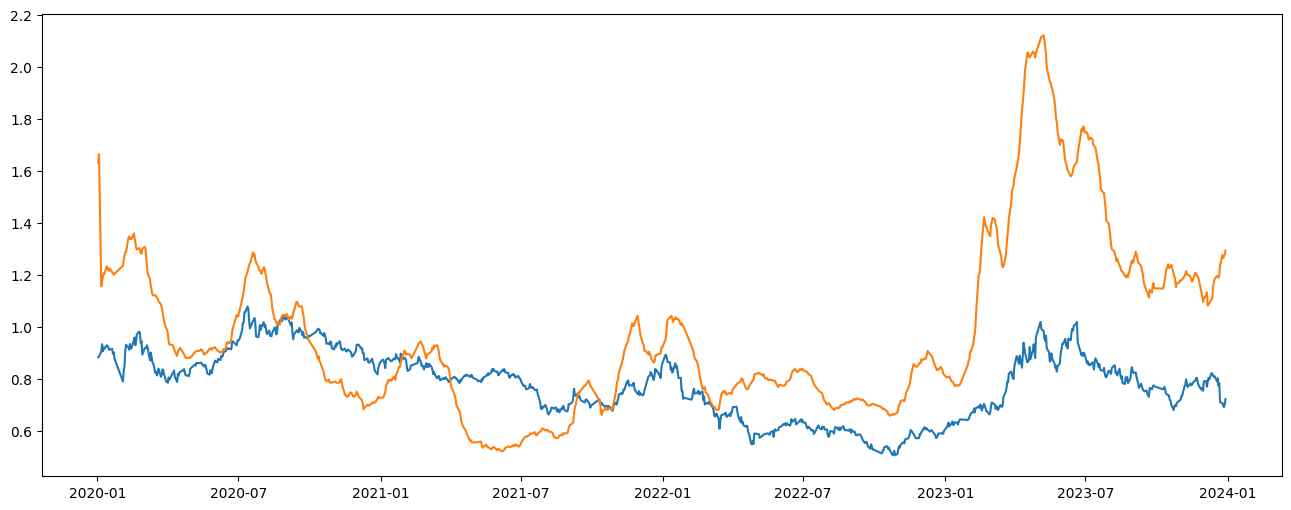

In [85]:
plt.figure(figsize=(16, 6))
plt.plot(df_price_entry.index, df_price_entry['512980.XSHG'])
plt.plot(df_price_entry.index, crowdness_df['512980.XSHG'])

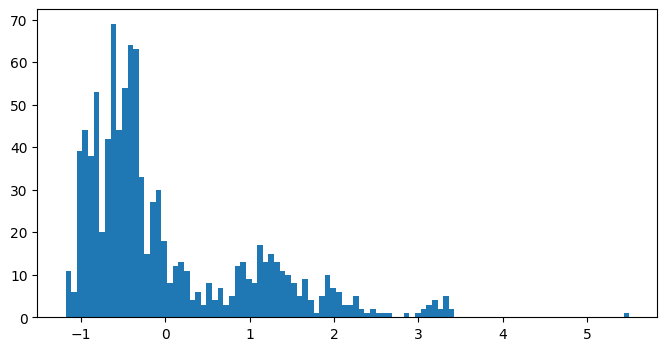

In [36]:
from scipy.stats import zscore
crowdness_df = crowdness_df.apply(zscore)
plt.figure(figsize=(8,4))
plt.hist(crowdness_df['159507.XSHE'], bins=100)
plt.show()

# 提取景气度指标

In [93]:
# get_consensus_industry_rating - 获取行业投资评级数据

boom_df = pd.DataFrame()
# 迭代字典，计算每个指数的平均指标
for index_name, stock_list in index_stk.items():
    boom = get_factor(stock_list, ['net_profit_parent_company_growth_ratio_ttm','du_return_on_equity_ttm','operating_revenue_growth_ratio_ttm'],start_date = '2020-01-01', end_date = '2023-12-31')
    medians = boom.groupby(level=1).median()
    boom_df[index_name] = medians.mean(axis=1)
boom_df

,399389.XSHE,H30199.XSHG,930608.INDX,930633.INDX,000949.XSHG,930601.INDX,930901.INDX,000813.XSHG,000932.XSHG,000928.XSHG,...,H30184.XSHG,399967.XSHE,399986.XSHE,399975.XSHE,399971.XSHE,399976.XSHE,931151.INDX,931160.INDX,H30015.XSHG,000945.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.231621,0.313290,0.857840,0.505358,0.709600,0.522422,0.011215,0.390608,0.397422,0.407961,...,0.358044,0.205528,0.142709,0.110868,-0.146121,0.446978,0.542638,0.490261,0.363188,0.548258
2020-01-03,0.231621,0.313290,0.857840,0.505358,0.709600,0.522422,0.011215,0.390608,0.397422,0.407961,...,0.358044,0.205528,0.142709,0.110868,-0.146121,0.446978,0.542638,0.490261,0.363188,0.548258
2020-01-06,0.231621,0.313290,0.857840,0.505358,0.709600,0.522422,0.011215,0.390608,0.397422,0.407961,...,0.358044,0.205528,0.142709,0.110868,-0.146121,0.446978,0.542638,0.490261,0.363188,0.548258
2020-01-07,0.231621,0.313290,0.857840,0.505358,0.709600,0.522422,0.011215,0.390608,0.397422,0.407961,...,0.358044,0.205528,0.142709,0.110868,-0.146121,0.446978,0.542638,0.490261,0.363188,0.548258
2020-01-08,0.231621,0.313290,0.857840,0.505358,0.709600,0.522422,0.011215,0.390608,0.397422,0.407961,...,0.358044,0.205528,0.142709,0.110868,-0.146121,0.446978,0.542638,0.490261,0.363188,0.548258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,0.369496,0.179144,0.777427,0.238837,0.428295,0.281029,0.065194,0.392003,0.323240,0.275665,...,0.078421,0.356153,0.078979,0.009380,-0.022196,0.855846,0.708594,0.688622,0.737422,0.090240
2023-12-26,0.369496,0.179144,0.777427,0.238837,0.428295,0.281029,0.065194,0.392003,0.323240,0.275665,...,0.078421,0.356153,0.078979,0.009380,-0.022196,0.855846,0.708594,0.688622,0.737422,0.090240
2023-12-27,0.369496,0.179144,0.777427,0.238837,0.428295,0.281029,0.065194,0.392003,0.323240,0.275665,...,0.078421,0.356153,0.078979,0.009380,-0.022196,0.855846,0.708594,0.688622,0.737422,0.090240


In [94]:
name_mapping = id_index.set_index('underlying_order_book_id')['order_book_id'].to_dict()
boom_df= boom_df.rename(columns=name_mapping)
boom_df.head()

,159507.XSHE,159611.XSHE,159619.XSHE,159766.XSHE,159825.XSHE,159852.XSHE,159869.XSHE,159870.XSHE,159928.XSHE,159930.XSHE,...,512480.XSHG,512660.XSHG,512800.XSHG,512880.XSHG,512980.XSHG,515030.XSHG,515790.XSHG,515880.XSHG,516110.XSHG,561320.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.231621,0.31329,0.85784,0.505358,0.7096,0.522422,0.011215,0.390608,0.397422,0.407961,...,0.358044,0.205528,0.142709,0.110868,-0.146121,0.446978,0.542638,0.490261,0.363188,0.548258
2020-01-03,0.231621,0.31329,0.85784,0.505358,0.7096,0.522422,0.011215,0.390608,0.397422,0.407961,...,0.358044,0.205528,0.142709,0.110868,-0.146121,0.446978,0.542638,0.490261,0.363188,0.548258
2020-01-06,0.231621,0.31329,0.85784,0.505358,0.7096,0.522422,0.011215,0.390608,0.397422,0.407961,...,0.358044,0.205528,0.142709,0.110868,-0.146121,0.446978,0.542638,0.490261,0.363188,0.548258
2020-01-07,0.231621,0.31329,0.85784,0.505358,0.7096,0.522422,0.011215,0.390608,0.397422,0.407961,...,0.358044,0.205528,0.142709,0.110868,-0.146121,0.446978,0.542638,0.490261,0.363188,0.548258
2020-01-08,0.231621,0.31329,0.85784,0.505358,0.7096,0.522422,0.011215,0.390608,0.397422,0.407961,...,0.358044,0.205528,0.142709,0.110868,-0.146121,0.446978,0.542638,0.490261,0.363188,0.548258


<Axes: xlabel='date'>

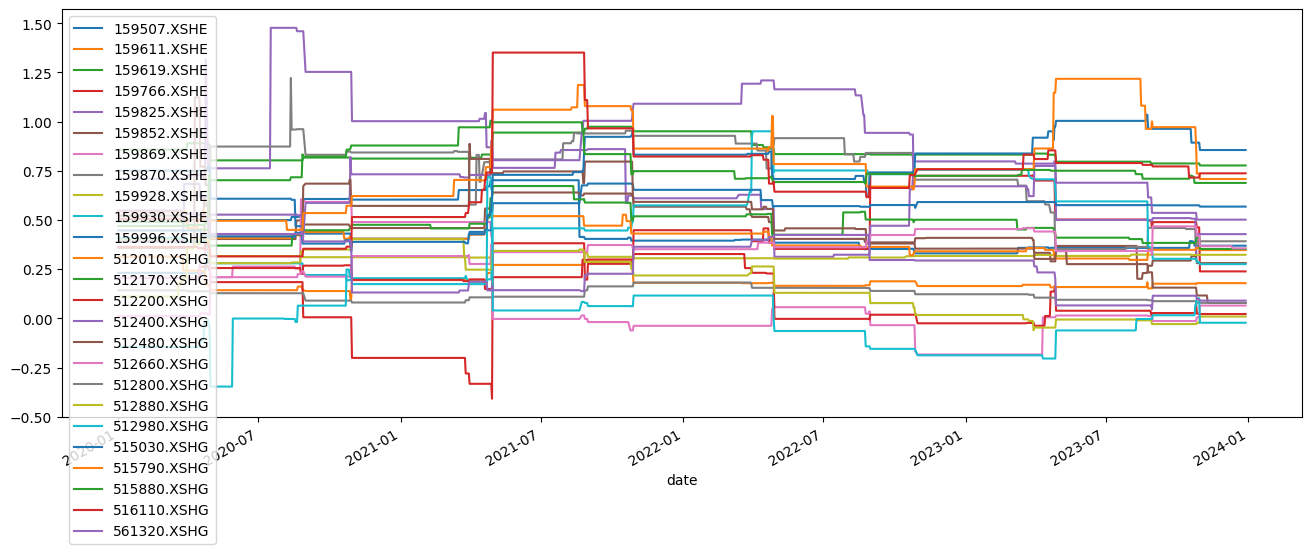

In [96]:
plt.figure(figsize=(16, 6))
plt.plot(df_price_entry.index, df_price_entry['512980.XSHG'])
plt.plot(df_price_entry.index, boom_df['512980.XSHG'])

## 提取景气度2 - 北向资金指标

In [13]:
total_north = pd.DataFrame()
for index in index_stk_df.columns:
    north_shares = get_stock_connect(index_stk_df[index].tolist(), start_date='2020-01-01', end_date='2023-12-31')[['shares_holding']]
    north_shares = north_shares.groupby(level=1).sum()
    total_north[index] = north_shares['shares_holding']

total_share = pd.DataFrame()
for index in index_stk_df.columns:
    shares = get_shares(index_stk_df[index].tolist(), start_date='2020-01-01', end_date='2023-12-31', fields=None, market='cn', expect_df=True)[['circulation_a']]
    shares = shares.groupby(level=1).sum()
    total_share[index] = shares['circulation_a']

In [14]:
north_pct = total_north/total_share
north_pct= north_pct.rename(columns=name_mapping)
north_pct = north_pct[north_pct.index.isin(df_price_entry.index)]
north_pct = north_pct.fillna(method='ffill')

NameError: name 'name_mapping' is not defined

<Axes: >

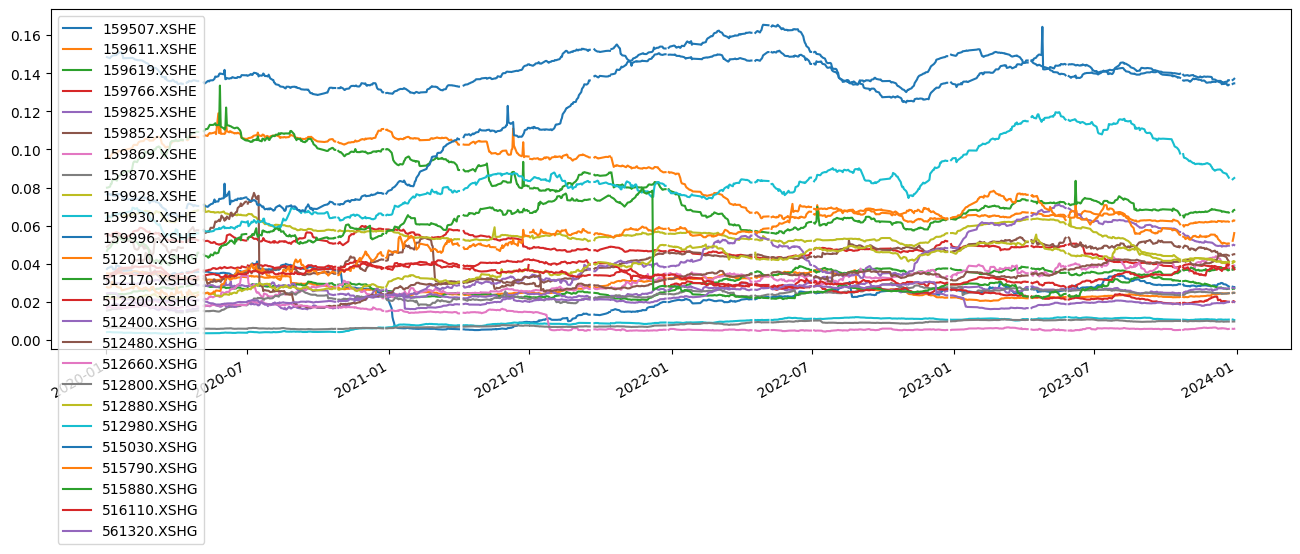

In [168]:
north_pct.plot(figsize = (16,5))

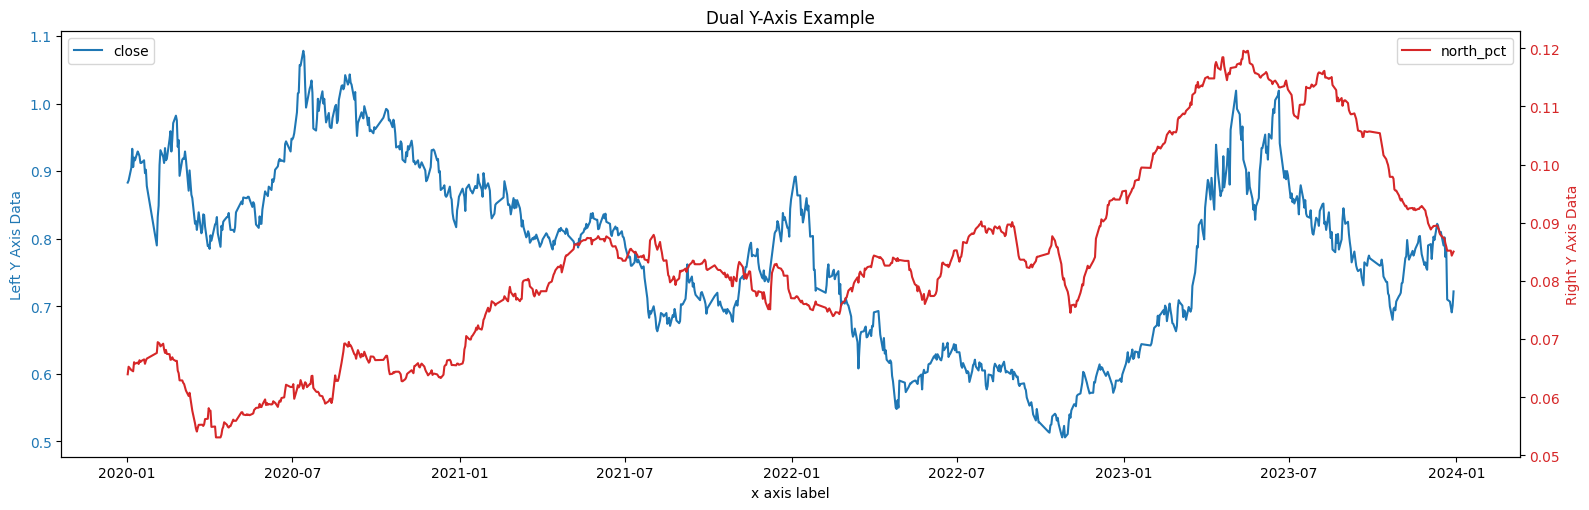

In [171]:
fig, ax1 = plt.subplots(figsize = (16,5))

color = 'tab:blue'
ax1.set_xlabel('x axis label')
ax1.set_ylabel('Left Y Axis Data', color=color)
ax1.plot(df_price_entry.index, df_price_entry['512980.XSHG'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Right Y Axis Data', color=color)
ax2.plot(df_price_entry.index,north_pct['512980.XSHG'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Dual Y-Axis Example')
ax1.legend(['close'], loc='upper left')
ax2.legend(['north_pct'], loc='upper right')

In [177]:
# 提取因子 北向资金加仓持续程度
import statsmodels.api as sm
def cal_continuality(df):
    tvalues_df = pd.DataFrame(index=df.index[1:])
    time_index = np.arange(1, 61)
    for etf in df.columns:
        rolling_windows = df[etf].rolling(window=60, min_periods=1)
        t_values = []
        for window in rolling_windows:
            if len(window.dropna()) < 2:  # 如果窗口中的非空数据少于2个，跳过
                continue          
            # 准备线性回归的数据
            X = sm.add_constant(time_index[:len(window)])
            y = window.values
            model = sm.OLS(y, X, missing='drop').fit()
            print(model.tvalues)
            t_values.append(model.tvalues[1])
        tvalues_df[etf] = t_values
    return tvalues_df
tvalues_df = cal_continuality(north_pct)


[0. 0.]
[18853.8189843    525.22220048]
[883.88228431  29.44649548]
[208.0565165    6.64409657]
[100.29461616   2.1134128 ]
[67.76404949  0.1627071 ]
[71.17496203 -0.63784878]
[62.23902422  0.49168847]
[67.528285    1.08474066]
[75.19092201  1.4933119 ]
[83.2453405   1.82596343]
[87.15191242  1.51749504]
[87.00245471  0.90953955]
[86.03146929  0.23738864]
[80.8364711  -0.62308592]
[82.85800761 -1.19110738]
[83.0977808  -1.86013575]
[82.91752191 -2.55613875]
[86.91124663 -3.06477191]
[90.37426678 -3.64298017]
[93.45015506 -4.26812597]
[96.86880437 -4.89797784]
[101.17348935  -5.46628255]
[105.50020228  -6.05437246]
[110.01954401  -6.60463708]
[111.88057537  -6.62315867]
[115.3579016   -6.87602545]
[119.02194815  -7.17095521]
[121.87355579  -7.34213912]
[124.77945401  -7.52609977]
[128.19180759  -7.79660959]
[131.93421436  -8.13753546]
[135.54027504  -8.46133724]
[139.34887129  -9.08676241]
[142.71325426  -9.75658878]
[146.69090906 -10.22821405]
[150.46044603 -10.66023769]
[152.26173878 

In [183]:
tvalues_df.to_csv("景气度.csv")

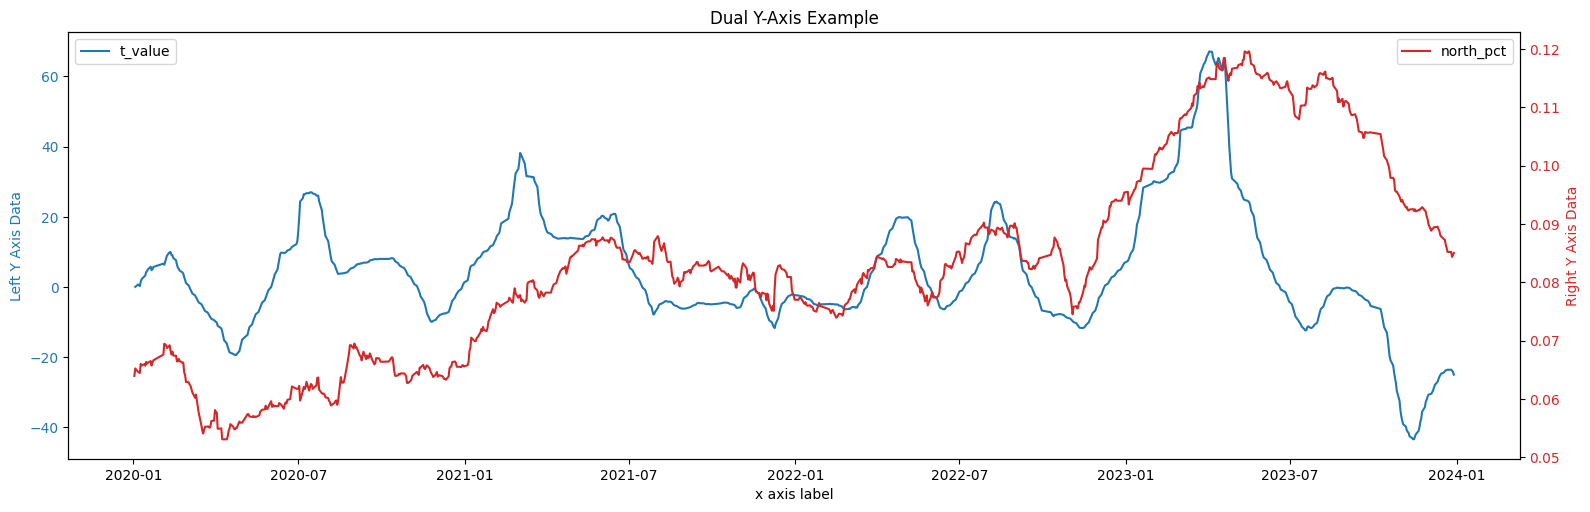

In [180]:
fig, ax1 = plt.subplots(figsize = (16,5))

color = 'tab:blue'
ax1.set_xlabel('x axis label')
ax1.set_ylabel('Left Y Axis Data', color=color)
ax1.plot(tvalues_df.index, tvalues_df['512980.XSHG'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Right Y Axis Data', color=color)
ax2.plot(north_pct.index,north_pct['512980.XSHG'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Dual Y-Axis Example')
ax1.legend(['t_value'], loc='upper left')
ax2.legend(['north_pct'], loc='upper right')


<Axes: xlabel='date'>

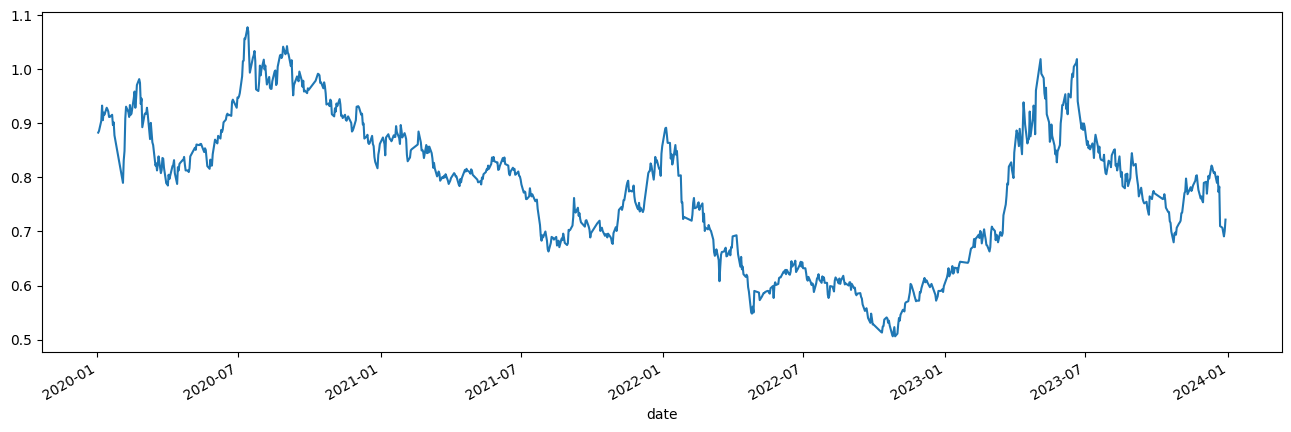

In [181]:
df_price_entry['512980.XSHG'].plot(figsize = (16,5))


# 以下是回测 强趋势低拥挤入场

2020-05-29 00:00:00: 买入 512660.XSHG, 价格 0.81, 数量 6100
2020-06-16 00:00:00: 买入 512800.XSHG, 价格 0.987, 数量 5100
2020-07-03 11:30:00: 卖出 512800.XSHG, 价格 1.044, 数量 5100
2020-07-08 10:30:00: 卖出 512660.XSHG, 价格 0.955, 数量 6100
2020-09-08 00:00:00: 买入 159930.XSHE, 价格 0.615, 数量 9000
2020-09-08 00:00:00: 买入 512010.XSHG, 价格 0.694, 数量 8100
2020-09-09 10:30:00: 卖出 512010.XSHG, 价格 0.6587, 数量 8100
2020-09-15 00:00:00: 买入 512400.XSHG, 价格 0.8320000000000001, 数量 6400
2020-09-23 11:30:00: 卖出 512400.XSHG, 价格 0.807, 数量 6400
2020-10-09 00:00:00: 买入 159996.XSHE, 价格 1.2209999999999999, 数量 4200
2020-10-30 11:30:00: 卖出 159996.XSHE, 价格 1.306, 数量 4200
2020-11-03 00:00:00: 买入 159928.XSHE, 价格 1.1442, 数量 4800
2020-11-06 10:30:00: 卖出 159928.XSHE, 价格 1.1508, 数量 4800
2020-11-12 00:00:00: 买入 512170.XSHG, 价格 0.7247, 数量 7700
2020-11-16 14:00:00: 卖出 159930.XSHE, 价格 0.649, 数量 9000
2020-11-18 10:30:00: 卖出 512170.XSHG, 价格 0.6963, 数量 7700
2020-12-04 00:00:00: 买入 512170.XSHG, 价格 0.718, 数量 7800
2020-12-21 00:00:00: 买入 512480.XSHG

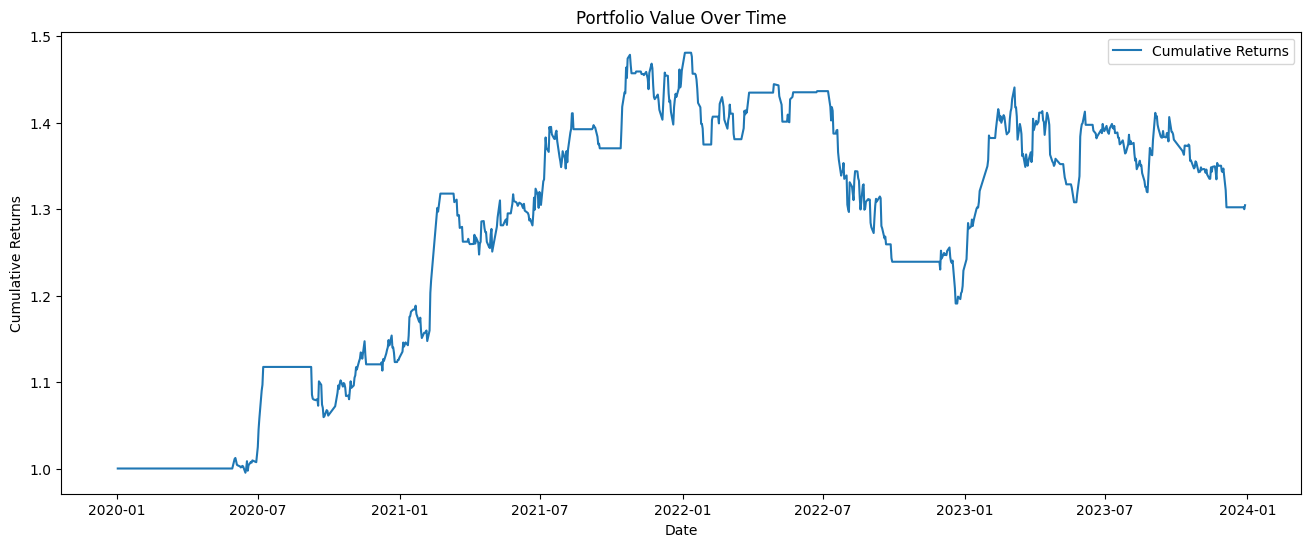

初始资金: 10000
最终资金: 13046.12999999999
年化收益率: 7.09%
最大回撤: -19.59%
未考虑无风险利率的夏普比率: 0.60
交易次数: 172


In [84]:
df = df_price_entry.copy()
count = 0
initial_capital = 10000
positions = 2
slippage_and_fees = 0.00  # 滑点
portfolio_value_tracker = []

capital = initial_capital
cash = initial_capital
etf_value = 0
holdings = {etf: 0 for etf in df.columns} 
peak = {etf: 0 for etf in df.columns}
# 初始止损位和止盈位
stop_loss_point = {etf: 0 for etf in df.columns}
take_profit_point = {etf: 0 for etf in df.columns}
entry_price = {etf: 0 for etf in df.columns}

# 突破60日均线 + 斜率
def check_buy_signals(etf, price_data_daily, current_date, start_date):
    if len(price_data_daily) < 60 or current_date < start_date + pd.Timedelta(days=60) or etf == '513050.XSHG' :
        return False
    
    previous_date = current_date - datetime.timedelta(120)
    crowdedness_data = crowdness_df[etf].loc[previous_date:current_date]
    # crowdedness_80_percentile = max(crowdedness_data.values)
    crowdedness_80_percentile = crowdedness_data.quantile(0.9)
    current_crowdedness = crowdedness_data.loc[current_date]
    if current_crowdedness >= crowdedness_80_percentile:
        return False

    # current_crowdness_rank = crowdness_df.loc[current_date].rank(ascending=False)[etf]    
    # if current_crowdness_rank <= 5:
    #     return False
    
    ma50 = price_data_daily[-60:].mean()
    yesterday_close = price_data_daily[-2]
    today_close = price_data_daily[-1]
    slope_positive = np.polyfit(range(60), price_data_daily[-60:], 1)[0] > 0
    if yesterday_close < ma50 and today_close >= ma50 and slope_positive:
        return True
    return False


def buy(etf, price, date):
    global capital, cash, etf_value, holdings, count
    if not np.isnan(price) and holdings[etf] == 0:
        num_held_etfs = sum(1 for h in holdings.values() if h > 0)
        if num_held_etfs < positions:
            investable_cash = cash / (positions - num_held_etfs)
            etf_amount = int(investable_cash * (1 - slippage_and_fees) / price) // 100 * 100
            holdings[etf] = etf_amount
            cash -= etf_amount * price 
            entry_price[etf] = price 
            stop_loss_point[etf] = price * 0.97
            take_profit_point[etf] = price * 1.06
            print(f"{date}: 买入 {etf}, 价格 {price}, 数量 {etf_amount}")
            count += 1

def check_stop_conditions(etf, price, current_date):
    global stop_loss_point, take_profit_point
    if etf ==  '513050.XSHG':
        return False

    previous_date = pd.to_datetime(current_date) - datetime.timedelta(90)
    crowdedness_data = crowdness_df[etf].loc[previous_date:current_date]
    # crowdedness_80_percentile = max(crowdedness_data.values)
    crowdedness_80_percentile = crowdedness_data.quantile(0.9)
    current_crowdedness = crowdedness_data.loc[current_date]
    if current_crowdedness >= crowdedness_80_percentile:
        return True

    if holdings[etf] <= 0:
        return False
    if price < stop_loss_point[etf]:
        return True

    if price >= take_profit_point[etf]:
        stop_loss_point[etf] = take_profit_point[etf]
        take_profit_point[etf] = entry_price[etf] * (1 + 0.01 * (int((price / entry_price[etf] - 1) / 0.01) + 1))
    return False


def sell(etf, price, date):
    global capital, cash, etf_value, holdings,count
    if not np.isnan(price) and holdings[etf] > 0:
        proceeds = holdings[etf] * price * (1 - slippage_and_fees)
        cash += proceeds 
        etf_value -= holdings[etf] * price
        print(f"{date}: 卖出 {etf}, 价格 {price}, 数量 {holdings[etf]}")
        holdings[etf] = 0
        count+=1

start_date = pd.to_datetime('2019-01-02')
# 主循环 循环df_price_entry和df_price_exit
trading_hours = ['10:30', '11:30', '14:00', '15:00']
for date, prices_daily in df.iterrows():
    date_str = date.strftime('%Y-%m-%d')
    for trading_hour in trading_hours:
        datetime_str = f"{date_str} {trading_hour}"
        datetime_index = pd.to_datetime(datetime_str)
        if datetime_index in df_price_exit.index:
            prices_hourly = df_price_exit.loc[datetime_index]

            # 循环 df_price_exit小时线数据找准时机出场
            for etf in prices_daily.index:
                if etf in prices_hourly and not np.isnan(prices_hourly[etf]):
                    price_hourly = prices_hourly[etf]
                    current_date = date_str
                    if check_stop_conditions(etf, price_hourly,current_date):
                        sell(etf, price_hourly, datetime_index)
    
    # 循环 df_price_entry 日线数据卖出
    for etf in prices_daily.index:
        price_data_daily = df[etf].loc[:date]
        if check_buy_signals(etf, price_data_daily, date, start_date):
            num_held_etfs = sum(1 for h in holdings.values() if h > 0)
            if num_held_etfs < positions:
                buy(etf, prices_daily[etf], date)
    etf_value = sum(holdings[etf] * prices_daily[etf] for etf in prices_daily.index if holdings[etf] > 0)
    capital = cash + etf_value
    portfolio_value_tracker.append(capital)

portfolio_values = np.array(portfolio_value_tracker)
returns = portfolio_values[1:] / portfolio_values[:-1] - 1
cumulative_returns = portfolio_values / initial_capital - 1

# 年化收益率
annualized_return = (portfolio_values[-1] / portfolio_values[0])**(250/len(portfolio_values))-1
rolling_max = np.maximum.accumulate(portfolio_values)
daily_drawdown = portfolio_values / rolling_max - 1
max_drawdown = np.min(daily_drawdown)

average_daily_return = np.mean(returns)
annualized_dev = np.std(returns) * np.sqrt(252)
sharp_ratio = annualized_return / annualized_dev

plt.figure(figsize=(16, 6))
plt.plot(df.index, portfolio_values/10000, label='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

print(f"初始资金: {initial_capital}")
print(f"最终资金: {portfolio_values[-1]}")
print(f"年化收益率: {annualized_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"未考虑无风险利率的夏普比率: {sharp_ratio:.2f}")
print(f"交易次数: {count}")

# 以下是回测 强趋势高景气入场

2020-04-02 00:00:00: 买入 512170.XSHG, 价格 0.485, 数量 10300
2020-04-10 11:30:00: 卖出 512170.XSHG, 价格 0.513, 数量 10300
2020-09-08 00:00:00: 买入 512010.XSHG, 价格 0.694, 数量 7400
2020-09-09 10:30:00: 卖出 512010.XSHG, 价格 0.6587, 数量 7400
2020-09-15 00:00:00: 买入 512400.XSHG, 价格 0.8320000000000001, 数量 6000
2020-09-15 00:00:00: 买入 515030.XSHG, 价格 1.079, 数量 4600
2020-09-23 11:30:00: 卖出 512400.XSHG, 价格 0.807, 数量 6000
2020-10-09 00:00:00: 买入 159996.XSHE, 价格 1.2209999999999999, 数量 4000
2020-10-15 14:00:00: 卖出 515030.XSHG, 价格 1.217, 数量 4600
2020-10-30 11:30:00: 卖出 159996.XSHE, 价格 1.306, 数量 4000
2020-11-12 00:00:00: 买入 512170.XSHG, 价格 0.7247, 数量 7400
2020-11-18 10:30:00: 卖出 512170.XSHG, 价格 0.6963, 数量 7400
2020-12-04 00:00:00: 买入 512170.XSHG, 价格 0.718, 数量 7400
2020-12-21 00:00:00: 买入 512480.XSHG, 价格 1.0595, 数量 5000
2020-12-23 10:30:00: 卖出 512170.XSHG, 价格 0.7467, 数量 7400
2020-12-25 10:30:00: 卖出 512480.XSHG, 价格 1.0215, 数量 5000
2021-01-04 00:00:00: 买入 512480.XSHG, 价格 1.0715, 数量 4900
2021-01-14 15:00:00: 卖出 512480

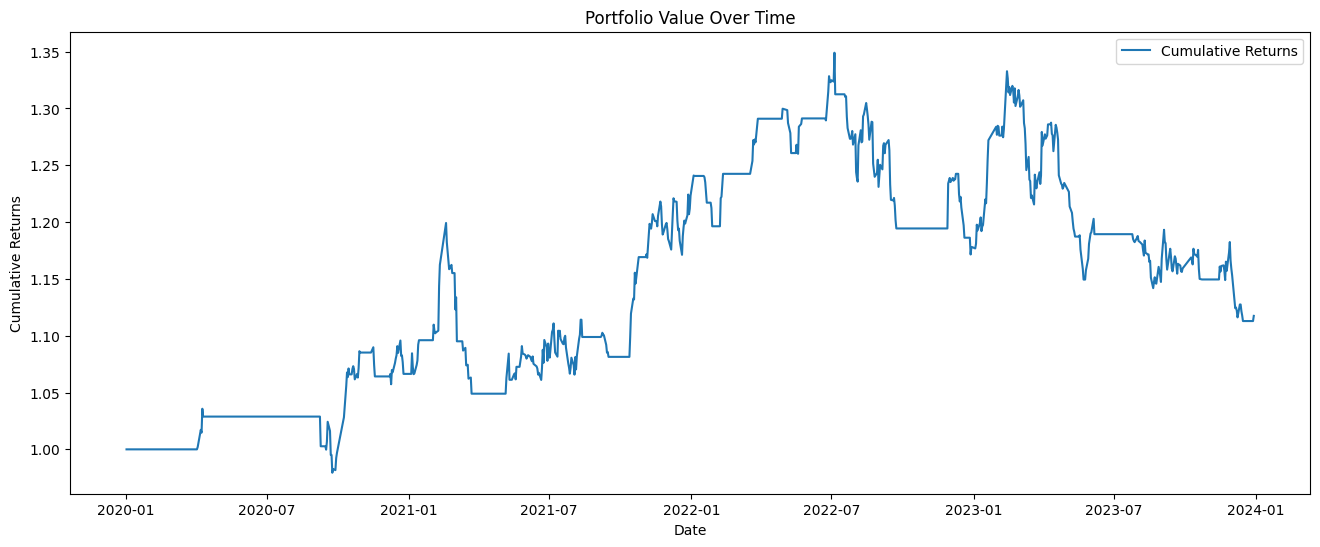

初始资金: 10000
最终资金: 11174.840000000004
年化收益率: 2.90%
最大回撤: -17.50%
未考虑无风险利率的夏普比率: 0.26
交易次数: 133


In [101]:
df = df_price_entry.copy()
count = 0
initial_capital = 10000
positions = 2
slippage_and_fees = 0.00  # 滑点
portfolio_value_tracker = []

capital = initial_capital
cash = initial_capital
etf_value = 0
holdings = {etf: 0 for etf in df.columns} 
peak = {etf: 0 for etf in df.columns}
# 初始止损位和止盈位
stop_loss_point = {etf: 0 for etf in df.columns}
take_profit_point = {etf: 0 for etf in df.columns}
entry_price = {etf: 0 for etf in df.columns}

# 突破60日均线 + 斜率
def check_buy_signals(etf, price_data_daily, current_date, start_date):
    if len(price_data_daily) < 60 or current_date < start_date + pd.Timedelta(days=60) or etf == '513050.XSHG' :
        return False
    
    # previous_date = current_date - datetime.timedelta(120)
    # crowdedness_data = crowdness_df[etf].loc[previous_date:current_date]
    # # crowdedness_80_percentile = max(crowdedness_data.values)
    # crowdedness_80_percentile = crowdedness_data.quantile(0.9)
    # current_crowdedness = crowdedness_data.loc[current_date]
    # if current_crowdedness >= crowdedness_80_percentile:
    #     return False

    current_boom_rank = boom_df.loc[current_date].rank(ascending=False)[etf]        
    ma50 = price_data_daily[-60:].mean()
    yesterday_close = price_data_daily[-2]
    today_close = price_data_daily[-1]
    slope_positive = np.polyfit(range(60), price_data_daily[-60:], 1)[0] > 0
    if yesterday_close < ma50 and today_close >= ma50 and slope_positive and current_boom_rank <= 15:
        return True
    return False


def buy(etf, price, date):
    global capital, cash, etf_value, holdings, count
    if not np.isnan(price) and holdings[etf] == 0:
        num_held_etfs = sum(1 for h in holdings.values() if h > 0)
        if num_held_etfs < positions:
            investable_cash = cash / (positions - num_held_etfs)
            etf_amount = int(investable_cash * (1 - slippage_and_fees) / price) // 100 * 100
            holdings[etf] = etf_amount
            cash -= etf_amount * price 
            entry_price[etf] = price 
            stop_loss_point[etf] = price * 0.97
            take_profit_point[etf] = price * 1.06
            print(f"{date}: 买入 {etf}, 价格 {price}, 数量 {etf_amount}")
            count += 1

def check_stop_conditions(etf, price, current_date):
    global stop_loss_point, take_profit_point
    if holdings[etf] <= 0:
        return False
    if price < stop_loss_point[etf]:
        return True

    if price >= take_profit_point[etf]:
        stop_loss_point[etf] = take_profit_point[etf]
        take_profit_point[etf] = entry_price[etf] * (1 + 0.01 * (int((price / entry_price[etf] - 1) / 0.01) + 1))
    return False


def sell(etf, price, date):
    global capital, cash, etf_value, holdings,count
    if not np.isnan(price) and holdings[etf] > 0:
        proceeds = holdings[etf] * price * (1 - slippage_and_fees)
        cash += proceeds 
        etf_value -= holdings[etf] * price
        print(f"{date}: 卖出 {etf}, 价格 {price}, 数量 {holdings[etf]}")
        holdings[etf] = 0
        count+=1

start_date = pd.to_datetime('2019-01-02')
# 主循环 循环df_price_entry和df_price_exit
trading_hours = ['10:30', '11:30', '14:00', '15:00']
for date, prices_daily in df.iterrows():
    date_str = date.strftime('%Y-%m-%d')
    for trading_hour in trading_hours:
        datetime_str = f"{date_str} {trading_hour}"
        datetime_index = pd.to_datetime(datetime_str)
        if datetime_index in df_price_exit.index:
            prices_hourly = df_price_exit.loc[datetime_index]

            # 循环 df_price_exit小时线数据找准时机出场
            for etf in prices_daily.index:
                if etf in prices_hourly and not np.isnan(prices_hourly[etf]):
                    price_hourly = prices_hourly[etf]
                    current_date = date_str
                    if check_stop_conditions(etf, price_hourly,current_date):
                        sell(etf, price_hourly, datetime_index)
    
    # 循环 df_price_entry 日线数据卖出
    for etf in prices_daily.index:
        price_data_daily = df[etf].loc[:date]
        if check_buy_signals(etf, price_data_daily, date, start_date):
            num_held_etfs = sum(1 for h in holdings.values() if h > 0)
            if num_held_etfs < positions:
                buy(etf, prices_daily[etf], date)
    etf_value = sum(holdings[etf] * prices_daily[etf] for etf in prices_daily.index if holdings[etf] > 0)
    capital = cash + etf_value
    portfolio_value_tracker.append(capital)

portfolio_values = np.array(portfolio_value_tracker)
returns = portfolio_values[1:] / portfolio_values[:-1] - 1
cumulative_returns = portfolio_values / initial_capital - 1

# 年化收益率
annualized_return = (portfolio_values[-1] / portfolio_values[0])**(250/len(portfolio_values))-1
rolling_max = np.maximum.accumulate(portfolio_values)
daily_drawdown = portfolio_values / rolling_max - 1
max_drawdown = np.min(daily_drawdown)

average_daily_return = np.mean(returns)
annualized_dev = np.std(returns) * np.sqrt(252)
sharp_ratio = annualized_return / annualized_dev

plt.figure(figsize=(16, 6))
plt.plot(df.index, portfolio_values/10000, label='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

print(f"初始资金: {initial_capital}")
print(f"最终资金: {portfolio_values[-1]}")
print(f"年化收益率: {annualized_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"未考虑无风险利率的夏普比率: {sharp_ratio:.2f}")
print(f"交易次数: {count}")